In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import polyan
import importlib

In [2]:
#read in expeerimental polysome traces
yeast_exp = pd.read_csv('Data/poly_yeast.csv')
hek_exp = pd.read_csv('Data/poly_hek.csv')

In [3]:
#model average traces for the HEK and yeast datasets, with and without the assumed "idle" ribosomes

#EXECUTION OF THIS CELL TAKES AROUND ONE MINUTE ON AN 8TH GEN i7

#read in HEK datset names
hek_datasets = pd.read_csv('Data/hek293_datasets.csv')['SeriesID'].values
yeast_datasets = pd.read_csv('Data/yeast_datasets.csv')['SeriesID'].values
#model peak volumes
hek_peak_vols_with,yeast_peak_vols_with=[],[]
hek_peak_vols_without,yeast_peak_vols_without=[],[]
for dataset_name in hek_datasets:
    dataset = pd.read_csv('Data/' + dataset_name +'.csv')
    if ('length' in dataset.columns) and ('RNA_Prints' in dataset.columns):
        hek_peak_vols_with.append(polyan.fp2poly(dataset,has_length=True,parset='HEK'))
        hek_peak_vols_without.append(polyan.fp2poly(dataset,has_length=True,parset='HEK',include_idle=False))
    elif 'RNA_Prints' in dataset.columns:
        hek_peak_vols_with.append(polyan.fp2poly(dataset,parset='HEK'))
        hek_peak_vols_without.append(polyan.fp2poly(dataset,parset='HEK',include_idle=False))
    else:
        hek_peak_vols_with.append(polyan.fp2poly(dataset,has_RNA=False,parset='HEK'))
        hek_peak_vols_without.append(polyan.fp2poly(dataset,has_RNA=False,parset='HEK',include_idle=False))
hek_av_with = np.mean(hek_peak_vols_with, axis=0)
hek_av_without = np.mean(hek_peak_vols_without, axis=0)

for dataset_name in yeast_datasets:
    dataset = pd.read_csv('Data/' + dataset_name +'.csv')
    if 'RNA_Prints' in dataset.columns:
        yeast_peak_vols_with.append(polyan.fp2poly(dataset))
        yeast_peak_vols_without.append(polyan.fp2poly(dataset,include_idle=False))
    else:       
        yeast_peak_vols_with.append(polyan.fp2poly(dataset,has_RNA=False))
        yeast_peak_vols_without.append(polyan.fp2poly(dataset,has_RNA=False))
yeast_av_with = np.mean(yeast_peak_vols_with, axis=0)
yeast_av_without = np.mean(yeast_peak_vols_without, axis=0)

In [4]:
#model the selected examples to display individually
yeast_samples = [polyan.fp2poly(pd.read_csv('Data/GSE76117.csv')),polyan.fp2poly(pd.read_csv('Data/GSE81269.csv'))]
hek_samples = [polyan.fp2poly(pd.read_csv('Data/GSE31539.csv'),parset='HEK'),polyan.fp2poly(pd.read_csv('Data/GSE129194.csv'),parset='HEK')]

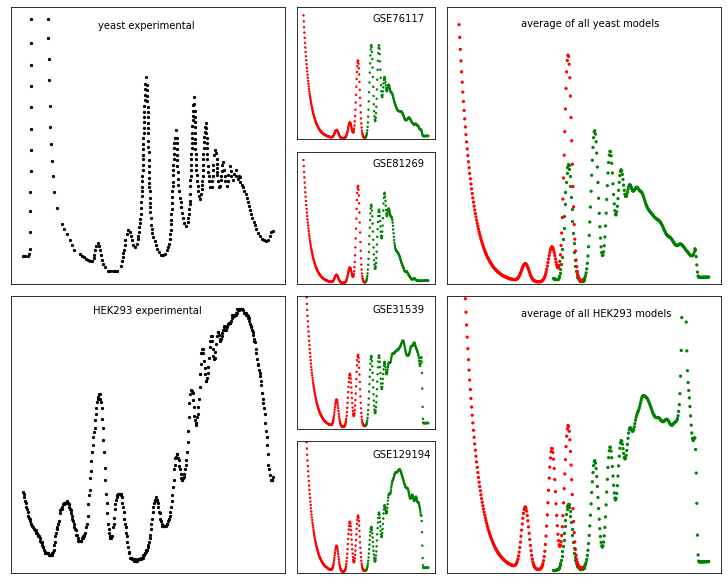

In [5]:
#plot experimental and modelled polysomes

plt.close()

#create a color vector to distinguish data-driven parts of modelled polysomes in green
cs = 200 * ['red'] + 200 * ['green']

#layout parameters
hek_max_y,yeast_max_y = 4,7
fig = plt.figure(constrained_layout=True,figsize=(10,8))
gs = fig.add_gridspec(4,6)

#plot experimental data
y_exp = fig.add_subplot(gs[:2,:2])
y_exp.scatter(yeast_exp['x'],yeast_exp['y'], s=5,c='black')
y_exp.text(0.3,0.95,'yeast experimental')
y_exp.set_xticks(())
y_exp.set_yticks(())

h_exp = fig.add_subplot(gs[2:4,:2])
h_exp.scatter(hek_exp['x'],hek_exp['y'], s=5,c='black')
h_exp.text(200,0.505,'HEK293 experimental')
h_exp.set_xticks(())
h_exp.set_yticks(())

#plot selected individual datasets
n = 0
for i,s in enumerate(yeast_samples):
    trace = polyan.plot_poly(s)
    axs = fig.add_subplot(gs[i,3])
    axs.scatter(trace[0],trace[1],s=2,c=cs)
    axs.set_ylim((0,yeast_max_y))
    axs.text(0.55,6.2,['GSE76117','GSE81269'][i])
    axs.set_xticks(())
    axs.set_yticks(())

for i,s in enumerate(hek_samples):
    trace = polyan.plot_poly(s)
    axs = fig.add_subplot(gs[i+2,3])
    axs.scatter(trace[0],trace[1],s=2,c=cs)
    axs.set_ylim((0,hek_max_y))
    axs.text(0.55,3.5,['GSE31539','GSE129194'][i])
    axs.set_xticks(())
    axs.set_yticks(())

#plot average polysomes
y_av = fig.add_subplot(gs[:2,4:])
y_trace_with = polyan.plot_poly(yeast_av_with)
y_trace_without = polyan.plot_poly(yeast_av_without)
reduce_y = max(y_trace_with[1][210:-50])/max(y_trace_without[1][210:-50])
y_av.scatter(y_trace_without[0][150:200],y_trace_without[1][150:200]*reduce_y,s=5,c='green')
y_av.scatter(y_trace_with[0],y_trace_with[1],s=5,c=cs)
y_av.set_ylim((0,yeast_max_y))
y_av.text(0.25,6.5,'average of all yeast models')
y_av.set_xticks(())
y_av.set_yticks(())

h_av = fig.add_subplot(gs[2:4,4:])
h_trace_with = polyan.plot_poly(hek_av_with)
h_trace_without = polyan.plot_poly(hek_av_without)
reduce_h = max(h_trace_with[1][210:-50])/max(h_trace_without[1][210:-50])
h_av.scatter(h_trace_without[0][150:200],h_trace_without[1][150:200]*reduce_h,s=5,c='green')
h_av.scatter(h_trace_with[0],h_trace_with[1],s=5,c=cs)
h_av.set_ylim((0,hek_max_y))
h_av.text(0.25,3.7,'average of all HEK293 models')
h_av.set_xticks(())
h_av.set_yticks(())
#plt.savefig('Figure 4 revised R2.svg')
plt.show()